In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import zipfile

In [ ]:
zf = zipfile.ZipFile('/content/drive/MyDrive/DarkMatter/training.csv.zip')
train = pd.read_csv(zf.open('training.csv'))
train.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,TrackQualitySubdetector2,FlagPrs,DLLelectron,DLLkaon,EcalE,TrackQualityPerNDoF,DLLproton,PrsDLLbeElectron,FlagRICH1,MuonLLbeBCK,FlagHcal,EcalShowerLongitudinalParameter,Calo2dFitQuality,TrackPt,TrackDistanceToZ,RICHpFlagPion,HcalDLLbeElectron,Calo3dFitQuality,FlagEcal,MuonLLbeMuon,TrackNDoFSubdetector1,RICHpFlagProton,RICHpFlagKaon,GhostProbability,TrackQualitySubdetector1,Label,RICH_DLLbeBCK,FlagRICH2,FlagBrem,HcalDLLbeMuon,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,17.585680,1.0,-6.411697,-7.213295,0.000001,1.467550,-26.667494,-2.730674,1.0,-5.152923,1.0,-999.000000,19.954819,3141.930677,0.613640,1.0,-0.909544,-999.000000,1.0,-0.661823,4.0,1.0,1.0,0.018913,5.366212,Muon,-21.913000,1.0,1.0,1.015345,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,20.230680,1.0,5.453014,0.000006,1531.542000,3.570540,-0.711194,1.773806,1.0,-999.000000,0.0,33.187644,0.037601,199.573653,0.465480,1.0,0.434909,13.667366,1.0,-999.000000,10.0,0.0,0.0,0.351206,9.144749,Ghost,-0.703617,0.0,1.0,-2.394644,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,11.619878,0.0,-999.000000,-999.000000,-999.000000,0.826442,-999.000000,-999.000000,0.0,-999.000000,0.0,-999.000000,-999.000000,94.829418,0.241891,0.0,-999.000000,-999.000000,0.0,-999.000000,5.0,0.0,0.0,0.195717,1.459992,Ghost,-999.000000,0.0,0.0,-999.000000,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,15.336305,1.0,-10.616585,-39.447507,4385.688000,1.076721,-29.291509,-3.053104,1.0,-999.000000,1.0,231.190351,2.839508,808.631064,0.680705,1.0,-1.504160,1939.259641,1.0,-999.000000,9.0,0.0,1.0,0.003972,22.950573,Pion,-47.223118,1.0,1.0,-0.321242,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,10.954629,1.0,-8.144945,26.050386,1220.930044,0.439767,21.386587,-2.730648,1.0,-999.000000,1.0,-794.866475,1.209193,1422.569214,0.575066,1.0,-1.576249,1867.165142,1.0,-999.000000,5.0,0.0,0.0,0.015232,3.516173,Proton,15.304688,0.0,1.0,-1.038026,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


In [ ]:
zf2 = zipfile.ZipFile('/content/drive/MyDrive/DarkMatter/test.csv.zip')
test = pd.read_csv(zf2.open('test.csv'))
test.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,TrackQualitySubdetector2,FlagPrs,DLLelectron,DLLkaon,EcalE,TrackQualityPerNDoF,DLLproton,PrsDLLbeElectron,FlagRICH1,MuonLLbeBCK,FlagHcal,EcalShowerLongitudinalParameter,Calo2dFitQuality,TrackPt,TrackDistanceToZ,RICHpFlagPion,HcalDLLbeElectron,Calo3dFitQuality,FlagEcal,MuonLLbeMuon,TrackNDoFSubdetector1,RICHpFlagProton,RICHpFlagKaon,GhostProbability,TrackQualitySubdetector1,RICH_DLLbeBCK,FlagRICH2,FlagBrem,HcalDLLbeMuon,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,ID
0,55086.199233,18.0,-0.438763,0.0,1.0,3.2,-1.843821,-4.579244,1.0,-1.732886,22.757613,1.0,-6.392882,16.911903,4416.383799,1.176239,37.200702,-2.321282,1.0,-999.000000,1.0,170.771073,0.328454,1732.758804,0.678807,1.0,-1.409228,3431.213151,1.0,-999.000000,7.0,0.0,1.0,0.004411,6.541830,22.749886,1.0,1.0,-1.790535,34.0,1.0,18.674086,-1.355015,24510.990244,0.0,1.0,9.325265,-0.250015,35.408585,0
1,3393.820071,17.0,-0.554341,0.0,1.0,0.0,-0.883237,-6.203035,1.0,-0.097206,21.951430,1.0,-6.867096,15.577288,0.000007,3.497992,11.866988,-2.460519,1.0,-999.000000,1.0,542.144654,20.769733,261.281253,0.170659,1.0,-0.600473,726.542115,1.0,-999.000000,8.0,0.0,0.0,0.046897,8.506494,11.725304,0.0,1.0,-0.289500,34.0,1.0,16.536804,-17.601196,778.675303,0.0,1.0,-0.000006,-6.646096,14.011904,1
2,18341.359361,12.0,-0.554339,0.0,1.0,0.0,-2.653786,-3.922639,1.0,0.936484,7.882976,1.0,-8.499948,0.000006,-0.000002,0.752767,-4.892094,-2.805346,1.0,-999.000000,1.0,6090.963363,37.769978,681.985887,0.485022,1.0,-1.926941,4777.214828,1.0,-999.000000,7.0,1.0,1.0,0.002792,9.069770,-1.835909,1.0,1.0,-1.441898,30.0,1.0,-1.306109,-4.536409,7915.212420,0.0,1.0,1.371346,-2.132609,-5.617409,2
3,27486.710933,7.0,-0.492411,1.0,1.0,3.2,-999.000000,2.034453,1.0,-999.000000,13.373016,1.0,0.322580,-2.280805,-999.000000,1.438089,-8.657205,-0.075777,1.0,-0.476107,0.0,-999.000000,-999.000000,1267.466426,0.277881,1.0,-999.000000,-999.000000,0.0,-0.018407,6.0,1.0,1.0,0.003242,8.600039,1.848607,1.0,1.0,-999.000000,21.0,1.0,-4.222793,3.149207,-999.000000,1.0,1.0,61.985428,0.946207,-8.657193,3
4,6842.249996,16.0,0.098706,0.0,1.0,3.2,2.644499,-1.471364,1.0,-2.909470,18.442923,1.0,1.970983,-3.425082,2965.656006,0.866863,-5.322182,-3.011893,1.0,-999.000000,1.0,657.940203,1.674208,232.944958,2.554630,1.0,0.596886,17.644837,1.0,-999.000000,4.0,0.0,0.0,0.006850,2.285350,-6.326513,0.0,1.0,-2.463674,29.0,1.0,-3.425113,23.147387,-0.000013,0.0,1.0,2.468453,2.614987,-5.713513,4


In [ ]:
print(train.columns)
print(test.columns)

Index(['TrackP', 'TrackNDoFSubdetector2', 'BremDLLbeElectron', 'MuonLooseFlag',
       'FlagSpd', 'SpdE', 'EcalDLLbeElectron', 'DLLmuon', 'RICHpFlagElectron',
       'EcalDLLbeMuon', 'TrackQualitySubdetector2', 'FlagPrs', 'DLLelectron',
       'DLLkaon', 'EcalE', 'TrackQualityPerNDoF', 'DLLproton',
       'PrsDLLbeElectron', 'FlagRICH1', 'MuonLLbeBCK', 'FlagHcal',
       'EcalShowerLongitudinalParameter', 'Calo2dFitQuality', 'TrackPt',
       'TrackDistanceToZ', 'RICHpFlagPion', 'HcalDLLbeElectron',
       'Calo3dFitQuality', 'FlagEcal', 'MuonLLbeMuon', 'TrackNDoFSubdetector1',
       'RICHpFlagProton', 'RICHpFlagKaon', 'GhostProbability',
       'TrackQualitySubdetector1', 'Label', 'RICH_DLLbeBCK', 'FlagRICH2',
       'FlagBrem', 'HcalDLLbeMuon', 'TrackNDoF', 'RICHpFlagMuon',
       'RICH_DLLbeKaon', 'RICH_DLLbeElectron', 'HcalE', 'MuonFlag', 'FlagMuon',
       'PrsE', 'RICH_DLLbeMuon', 'RICH_DLLbeProton'],
      dtype='object')
Index(['TrackP', 'TrackNDoFSubdetector2', 'BremDLLbeElec

In [ ]:
train['Label'].value_counts()

Kaon        200000
Ghost       200000
Muon        200000
Proton      200000
Electron    200000
Pion        200000
Name: Label, dtype: int64

In [ ]:
train['Label'] = train['Label'].map({"Proton":0, 'Muon':1,'Pion':2, 'Electron':3, 'Ghost':4, 'Kaon':5})


In [ ]:
train.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,TrackQualitySubdetector2,FlagPrs,DLLelectron,DLLkaon,EcalE,TrackQualityPerNDoF,DLLproton,PrsDLLbeElectron,FlagRICH1,MuonLLbeBCK,FlagHcal,EcalShowerLongitudinalParameter,Calo2dFitQuality,TrackPt,TrackDistanceToZ,RICHpFlagPion,HcalDLLbeElectron,Calo3dFitQuality,FlagEcal,MuonLLbeMuon,TrackNDoFSubdetector1,RICHpFlagProton,RICHpFlagKaon,GhostProbability,TrackQualitySubdetector1,Label,RICH_DLLbeBCK,FlagRICH2,FlagBrem,HcalDLLbeMuon,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,17.585680,1.0,-6.411697,-7.213295,0.000001,1.467550,-26.667494,-2.730674,1.0,-5.152923,1.0,-999.000000,19.954819,3141.930677,0.613640,1.0,-0.909544,-999.000000,1.0,-0.661823,4.0,1.0,1.0,0.018913,5.366212,1,-21.913000,1.0,1.0,1.015345,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,20.230680,1.0,5.453014,0.000006,1531.542000,3.570540,-0.711194,1.773806,1.0,-999.000000,0.0,33.187644,0.037601,199.573653,0.465480,1.0,0.434909,13.667366,1.0,-999.000000,10.0,0.0,0.0,0.351206,9.144749,4,-0.703617,0.0,1.0,-2.394644,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,11.619878,0.0,-999.000000,-999.000000,-999.000000,0.826442,-999.000000,-999.000000,0.0,-999.000000,0.0,-999.000000,-999.000000,94.829418,0.241891,0.0,-999.000000,-999.000000,0.0,-999.000000,5.0,0.0,0.0,0.195717,1.459992,4,-999.000000,0.0,0.0,-999.000000,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,15.336305,1.0,-10.616585,-39.447507,4385.688000,1.076721,-29.291509,-3.053104,1.0,-999.000000,1.0,231.190351,2.839508,808.631064,0.680705,1.0,-1.504160,1939.259641,1.0,-999.000000,9.0,0.0,1.0,0.003972,22.950573,2,-47.223118,1.0,1.0,-0.321242,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,10.954629,1.0,-8.144945,26.050386,1220.930044,0.439767,21.386587,-2.730648,1.0,-999.000000,1.0,-794.866475,1.209193,1422.569214,0.575066,1.0,-1.576249,1867.165142,1.0,-999.000000,5.0,0.0,0.0,0.015232,3.516173,0,15.304688,0.0,1.0,-1.038026,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X = train.drop('Label', axis = 1)
Y = train['Label']
train_x, valid_x, train_y, valid_y = train_test_split(X, Y)

NameError: ignored

In [ ]:
result

,model names,Accuracy
0,Logistic Regression,0.451090
1,Adaboost,0.689250
2,DecisionTree,0.670080
3,K nearest neighbors,0.474253


In [ ]:
model = RandomForestClassifier()
model.fit(train_x, train_y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predict = model.predict(valid_x)
accuracy_score(valid_y, predict)

0.7591833333333333

In [ ]:
from sklearn.metrics import log_loss
proba_clf = model.predict_proba(valid_x)
log_loss(valid_y, proba_clf)

0.6650306293547558

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
class_label = {0:"Proton", 1:'Muon',2:'Pion', 3:'Electron', 4:'Ghost', 5:'Kaon'}
def roc_curves(predictions, labels):
    plt.figure(figsize=(9, 6))
    u_labels = np.unique(labels)
    for lab in u_labels:
        y_true = labels == lab
        y_pred = predictions[:, lab]
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        plt.plot(tpr, 1-fpr, linewidth=3, label=class_label[lab] + ', AUC = ' + str(np.round(auc, 4)))
        plt.xlabel('Signal efficiency (TPR)', size=15)
        plt.ylabel("Background rejection (1 - FPR)", size=15)
        plt.xticks(size=15)
        plt.yticks(size=15)
        plt.xlim(0., 1)
        plt.ylim(0., 1)
        plt.legend(loc='lower left', fontsize=15)
        plt.title('One particle vs rest ROC curves', loc='right', size=15)
        plt.grid(b=1)

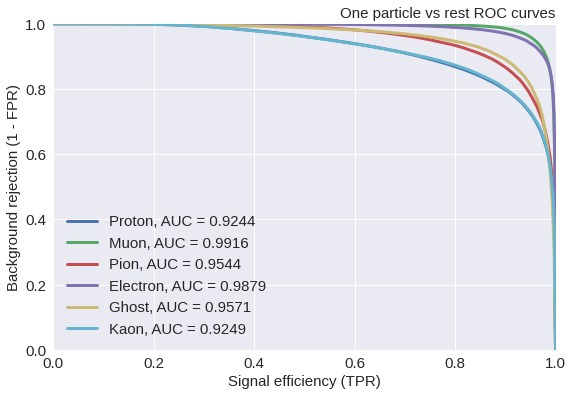

In [ ]:
roc_curves(proba_clf, valid_y)

In [ ]:
import pickle

In [ ]:
#filename = '/content/drive/MyDrive/DarkMatter/rf_model'
#pickle.dump(model, open(filename, 'wb'))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(valid_y, predict))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61     49993
           1       0.91      0.91      0.91     50294
           2       0.71      0.79      0.75     49990
           3       0.88      0.88      0.88     50066
           4       0.75      0.79      0.77     50016
           5       0.64      0.61      0.62     49641

    accuracy                           0.76    300000
   macro avg       0.76      0.76      0.76    300000
weighted avg       0.76      0.76      0.76    300000



In [ ]:
def efficiency(predictions, labels, spectator, eff=60, n_bins=20, xlabel='Spectator'):
    plt.figure(figsize=(6*2, 4*3))
    u_labels = np.unique(labels)
    for lab in u_labels:
        y_true = labels == lab
        pred = predictions[y_true, lab]
        spec = spectator[y_true]
        plt.subplot(3, 2, lab+1)
        plot(pred, spec, cut=eff, percentile=True, weights=None, n_bins=n_bins, color='1', marker='o', 
                  ms=7, label=class_label[lab], fmt='o')
        
        plt.plot([spec.min(), spec.max()], [eff / 100., eff / 100.], label='Global signal efficiecny', color='r', linewidth=3)
        plt.legend(loc='best', fontsize=12)
        plt.xticks(size=12)
        plt.yticks(size=12)
        plt.ylabel('Signal efficiency (TPR)', size=12)
        plt.xlabel(xlabel,size=12)
        plt.ylim(0, 1)
        plt.xlim(spec.min(), spec.max())
        plt.grid(b=1)
    plt.tight_layout()
        

def efficiency_on_p(predictions, labels, spectator, eff=60, n_bins=20):
    sel = spectator < 200 * 10**3
    efficiency(predictions[sel], labels[sel], spectator[sel] / 10**3, eff, n_bins, 'Momentum, GeV/c')

In [ ]:
def my_percentile(arr, w, q):
    left = 0.
    right = (w).sum()
    sort_inds = np.argsort(arr, axis=0)
    if left/right >= q/100.:
        return arr[0]
    for i in sort_inds:
        left += w[i]
        if left/right >= q/100.:
            return arr[i]

def plot(prediction, spectator, cut, percentile=True, weights=None, n_bins=100,
              color='b', marker='o', ms=4, label="MVA", fmt='o', markeredgecolor='b', markeredgewidth=2, ecolor='b'):
    if weights is None:
        weights = np.ones(len(prediction))

    if percentile:
        if weights is None:
            cut = np.percentile(prediction, 100-cut)
        else:
            cut = my_percentile(prediction, weights, 100-cut)
    
    edges = np.linspace(spectator.min(), spectator.max(), n_bins)
    
    xx = []
    yy = []
    xx_err = []
    yy_err = []
    
    for i_edge in range(len(edges)-1):

        left = edges[i_edge]
        right = edges[i_edge + 1]
        
        N_tot_bin = weights[((spectator >= left) * (spectator < right))].sum()
        N_cut_bin = weights[((spectator >= left) * (spectator < right) * (prediction >= cut))].sum()
        
        if N_tot_bin != 0:
            
            x = 0.5 * (right + left)
            y = 1. * N_cut_bin / N_tot_bin
            
            if y > 1.:
                y = 1.
            if y < 0:
                y = 0
            
            xx.append(x)
            yy.append(y)
            
            x_err = 0.5 * (right - left)
            y_err = np.sqrt(y*(1-y)/N_tot_bin)
            
            xx_err.append(x_err)
            yy_err.append(y_err)
        
        else:
            pass

    plt.errorbar(xx, yy, yerr=yy_err, xerr=xx_err, fmt=fmt, color=color, marker=marker, ms=ms, label=label, markeredgecolor=markeredgecolor, markeredgewidth=markeredgewidth, ecolor=ecolor)
    
    return cut

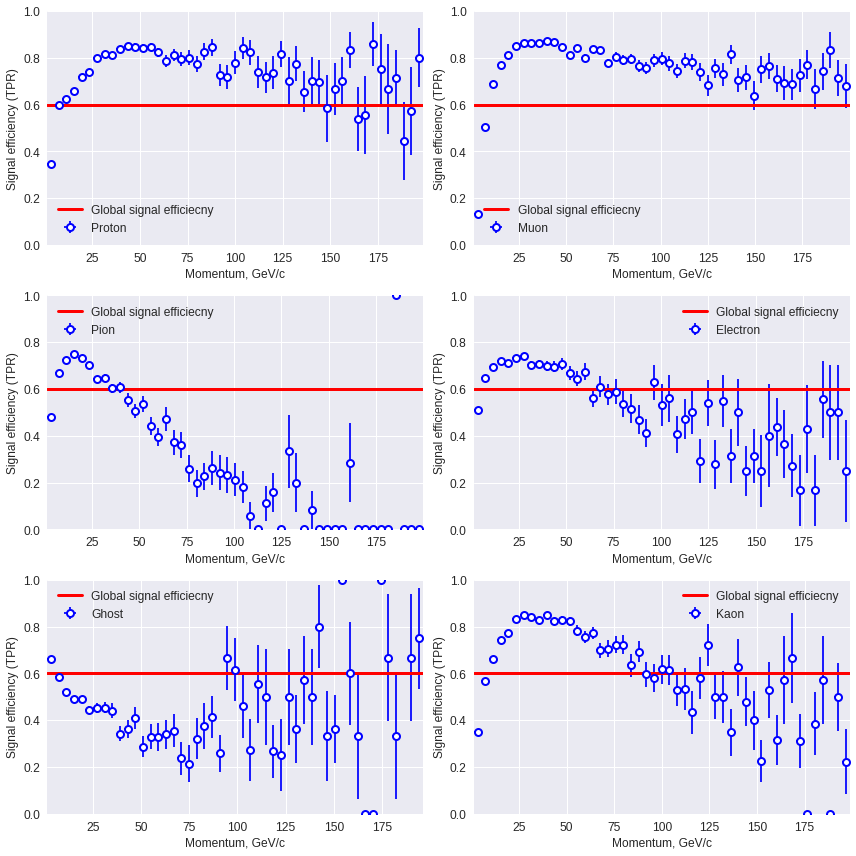

In [ ]:
efficiency_on_p(proba_clf, valid_y, valid_x['TrackP'].values, 60, 50)
plt.show()

In [ ]:
filename = '/content/drive/MyDrive/DarkMatter/rf_model'
model = pickle.load(open(filename, 'rb'))
result = model.predict(test.drop('ID', axis = 1))

In [ ]:
test['Label'] = result
test['Label'] = test['Label'].map(class_label)

In [ ]:
test.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,TrackQualitySubdetector2,FlagPrs,DLLelectron,DLLkaon,EcalE,TrackQualityPerNDoF,DLLproton,PrsDLLbeElectron,FlagRICH1,MuonLLbeBCK,FlagHcal,EcalShowerLongitudinalParameter,Calo2dFitQuality,TrackPt,TrackDistanceToZ,RICHpFlagPion,HcalDLLbeElectron,Calo3dFitQuality,FlagEcal,MuonLLbeMuon,TrackNDoFSubdetector1,RICHpFlagProton,RICHpFlagKaon,GhostProbability,TrackQualitySubdetector1,RICH_DLLbeBCK,FlagRICH2,FlagBrem,HcalDLLbeMuon,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,ID,Label
0,55086.199233,18.0,-0.438763,0.0,1.0,3.2,-1.843821,-4.579244,1.0,-1.732886,22.757613,1.0,-6.392882,16.911903,4416.383799,1.176239,37.200702,-2.321282,1.0,-999.000000,1.0,170.771073,0.328454,1732.758804,0.678807,1.0,-1.409228,3431.213151,1.0,-999.000000,7.0,0.0,1.0,0.004411,6.541830,22.749886,1.0,1.0,-1.790535,34.0,1.0,18.674086,-1.355015,24510.990244,0.0,1.0,9.325265,-0.250015,35.408585,0,Proton
1,3393.820071,17.0,-0.554341,0.0,1.0,0.0,-0.883237,-6.203035,1.0,-0.097206,21.951430,1.0,-6.867096,15.577288,0.000007,3.497992,11.866988,-2.460519,1.0,-999.000000,1.0,542.144654,20.769733,261.281253,0.170659,1.0,-0.600473,726.542115,1.0,-999.000000,8.0,0.0,0.0,0.046897,8.506494,11.725304,0.0,1.0,-0.289500,34.0,1.0,16.536804,-17.601196,778.675303,0.0,1.0,-0.000006,-6.646096,14.011904,1,Proton
2,18341.359361,12.0,-0.554339,0.0,1.0,0.0,-2.653786,-3.922639,1.0,0.936484,7.882976,1.0,-8.499948,0.000006,-0.000002,0.752767,-4.892094,-2.805346,1.0,-999.000000,1.0,6090.963363,37.769978,681.985887,0.485022,1.0,-1.926941,4777.214828,1.0,-999.000000,7.0,1.0,1.0,0.002792,9.069770,-1.835909,1.0,1.0,-1.441898,30.0,1.0,-1.306109,-4.536409,7915.212420,0.0,1.0,1.371346,-2.132609,-5.617409,2,Pion
3,27486.710933,7.0,-0.492411,1.0,1.0,3.2,-999.000000,2.034453,1.0,-999.000000,13.373016,1.0,0.322580,-2.280805,-999.000000,1.438089,-8.657205,-0.075777,1.0,-0.476107,0.0,-999.000000,-999.000000,1267.466426,0.277881,1.0,-999.000000,-999.000000,0.0,-0.018407,6.0,1.0,1.0,0.003242,8.600039,1.848607,1.0,1.0,-999.000000,21.0,1.0,-4.222793,3.149207,-999.000000,1.0,1.0,61.985428,0.946207,-8.657193,3,Muon
4,6842.249996,16.0,0.098706,0.0,1.0,3.2,2.644499,-1.471364,1.0,-2.909470,18.442923,1.0,1.970983,-3.425082,2965.656006,0.866863,-5.322182,-3.011893,1.0,-999.000000,1.0,657.940203,1.674208,232.944958,2.554630,1.0,0.596886,17.644837,1.0,-999.000000,4.0,0.0,0.0,0.006850,2.285350,-6.326513,0.0,1.0,-2.463674,29.0,1.0,-3.425113,23.147387,-0.000013,0.0,1.0,2.468453,2.614987,-5.713513,4,Electron
